In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

#Importing the DataSet

In [5]:
data=pd.read_csv('/content/Housing Pricing.csv')#data is now a dataframe

In [6]:
#confirm the data has been imported successfully
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,118000


In [7]:
#get the shape(dimensionality) of the data
data.shape

(1460, 77)

In [8]:
data.drop('Id',inplace=True, axis=1)#axis = 1 indicates we are dropping a column

so the data.shape returns 1460, 77-> 1460 dimensions and 77 elements

In [9]:
data.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500


In [11]:
#we are saving the columns in a list
original_features=list(data.columns)
len(original_features)

76

In [12]:
#look for those features with missing values
features_missing_values=list(data.columns[data.isna().any()])
#isna() will detect missing values in the data....it will return a dataframe containing those elements with missing values
len(features_missing_values)

15

#**Filling in Missing Values**

In [13]:
bfill,mean_fill=[],[]

In [19]:
for feature in features_missing_values:
  print(feature, ' ',data[feature].isna().sum()/len(data)*100,'',data[feature].dtype)#will give the percentage of null data per feature
  if data[feature].dtype=='float64':
    mean_fill.append(feature)#the values will be filled in using the mean if they are numericals and they'll append them to the mean_fill list
  else:
      bfill.append(feature)#other types will be filled in using backward filling and they'll be appended to the bfill list

LotFrontage   17.73972602739726  float64
MasVnrType   0.547945205479452  object
MasVnrArea   0.547945205479452  float64
BsmtQual   2.5342465753424657  object
BsmtCond   2.5342465753424657  object
BsmtExposure   2.6027397260273974  object
BsmtFinType1   2.5342465753424657  object
BsmtFinType2   2.6027397260273974  object
Electrical   0.0684931506849315  object
FireplaceQu   47.26027397260274  object
GarageType   5.5479452054794525  object
GarageYrBlt   5.5479452054794525  float64
GarageFinish   5.5479452054794525  object
GarageQual   5.5479452054794525  object
GarageCond   5.5479452054794525  object


In [20]:
mean_fill

['LotFrontage',
 'MasVnrArea',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt']

In [23]:
bfill

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [21]:
for feature in mean_fill:
  data[feature].fillna(data[feature].mean(),inplace=True)
  #the features that have null values will be filled in using the mean of the data in that feature

In [24]:
for feature in bfill:
  data[feature].fillna(method='bfill', inplace=True)
  #the method to be used in filling the missing values in the respective features will be Backward Filling

#**Encode the Dataset**

In [27]:
categorical_features=list(data.select_dtypes(include=['object']).columns)
#will put all the features with the 'Object' datatype in one list
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [33]:
numerical_features=list(set(original_features)-set(categorical_features))#will leave out the numericals
numerical_features
#len(numerical)

['MSSubClass',
 'OverallCond',
 'PoolArea',
 'BsmtUnfSF',
 'EnclosedPorch',
 'OpenPorchSF',
 'GarageCars',
 'MiscVal',
 'LowQualFinSF',
 'MasVnrArea',
 'KitchenAbvGr',
 '1stFlrSF',
 'TotRmsAbvGrd',
 'BedroomAbvGr',
 'Fireplaces',
 'SalePrice',
 '2ndFlrSF',
 'MoSold',
 'FullBath',
 'OverallQual',
 'HalfBath',
 'BsmtFinSF2',
 'LotFrontage',
 'BsmtFullBath',
 'GarageYrBlt',
 'LotArea',
 'YearRemodAdd',
 'BsmtFinSF1',
 'ScreenPorch',
 '3SsnPorch',
 'TotalBsmtSF',
 'GrLivArea',
 'BsmtHalfBath',
 'YrSold',
 'WoodDeckSF',
 'GarageArea',
 'YearBuilt']

In [35]:
nominal_features=['Neighborhood', 'MSZoning', 'LandContour', 'Street', 'LotConfig']
nominal_features

['Neighborhood', 'MSZoning', 'LandContour', 'Street', 'LotConfig']

Nominal features have no order, ordinal features have order!

In [36]:
ordinal_features=list(set(categorical_features)-set(nominal_features))
ordinal_features

['ExterQual',
 'Condition2',
 'Utilities',
 'Electrical',
 'BsmtCond',
 'GarageType',
 'RoofStyle',
 'FireplaceQu',
 'HeatingQC',
 'Exterior1st',
 'LandSlope',
 'Heating',
 'RoofMatl',
 'CentralAir',
 'Foundation',
 'BsmtFinType2',
 'SaleType',
 'MasVnrType',
 'BsmtFinType1',
 'Condition1',
 'GarageQual',
 'HouseStyle',
 'ExterCond',
 'BsmtExposure',
 'BldgType',
 'GarageCond',
 'GarageFinish',
 'Functional',
 'LotShape',
 'SaleCondition',
 'PavedDrive',
 'BsmtQual',
 'KitchenQual',
 'Exterior2nd']

In [50]:
target=['SalePrice']

In [51]:
# one-hot encode nominal features
df_nominal = pd.get_dummies(data[nominal_features])

In [52]:
#encode ordinal features
for feature in ordinal_features:
  data[feature]=data[feature].astype('category').cat.codes

df_ordinal=data[ordinal_features]

In [53]:
#form a new dataset by concatenating the endcoded datarames
encoded_dataset=pd.concat([df_nominal, df_ordinal,data[numerical_features]],axis=1)
encoded_dataset
encoded_dataset.shape

(1460, 112)

#Standardizing the dataset

In [54]:
#remove the target from the dataset
encoded_dataset.drop('SalePrice',axis=1,inplace=True)

In [55]:
#convert the dataset to numpy arrat and standardize
X=encoded_dataset.to_numpy()
X_standardized=StandardScaler().fit_transform(X)
X_standardized

array([[-0.10854037, -0.03703704, -0.10526316, ..., -0.75217584,
         0.35100032,  1.05099379],
       [-0.10854037, -0.03703704, -0.10526316, ...,  1.62619479,
        -0.06073101,  0.15673371],
       [-0.10854037, -0.03703704, -0.10526316, ..., -0.75217584,
         0.63172623,  0.9847523 ],
       ...,
       [-0.10854037, -0.03703704, -0.10526316, ..., -0.75217584,
        -1.03391416, -1.00249232],
       [-0.10854037, -0.03703704, -0.10526316, ...,  2.16891024,
        -1.09005935, -0.70440562],
       [-0.10854037, -0.03703704, -0.10526316, ...,  5.12192075,
        -0.9216238 , -0.20759447]])

To understand why we need to standardize: https://www.trifacta.com/standardize-data-in-excel/

In [57]:
#array representing the target
y=data[target]

In [60]:
y=StandardScaler().fit_transform(y)
y

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

#Feature Selection using L1
Initialize and train the model.


Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models



In [61]:
regressor=LassoCV()
regressor.fit(X_standardized,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

Get the series of coefficients from the trained model. The most penalized features will have coefficients of 0. Selected features will have coefficients not equal to 0.

79  selected features


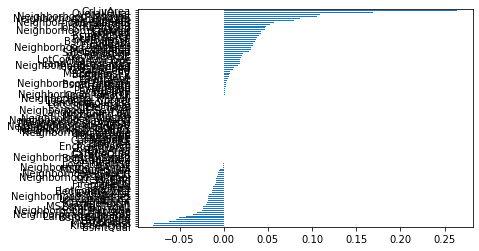

In [63]:
#coefficients tell us which features have been selected and which ones haven't
coefficients = pd.Series(regressor.coef_, index = encoded_dataset.columns)
sorted_coef = coefficients.sort_values()
sorted_coef.plot(kind = 'barh')#kind is bar graph

no_of_selected_features = sum(coefficients != 0)#will get the sum of coefficients that are != 0
no_of_rejected_features = sum(coefficients == 0)
total_features = no_of_selected_features + no_of_rejected_features
print(no_of_selected_features," selected features")

#Removing unselected Features

Create a list of rejected features (coefficient labels where coefficient is 0). Then use the list to drop the features from the dataset


In [64]:
rejected_features=[]

#get the rejected features
for label,value in zip(coefficients.index,coefficients.values):
  if value == 0:
    rejected_features.append(label)

df_standardized=pd.DataFrame(X_standardized,columns=encoded_dataset.columns)
X_selected=df_standardized.drop(rejected_features,axis=1)
X_selected


,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,MSZoning_C (all),MSZoning_FV,MSZoning_RM,LandContour_Bnk,LandContour_HLS,Street_Grvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,ExterQual,Condition2,Utilities,BsmtCond,RoofStyle,FireplaceQu,HeatingQC,Exterior1st,LandSlope,Heating,RoofMatl,CentralAir,SaleType,MasVnrType,BsmtFinType1,HouseStyle,ExterCond,BsmtExposure,BldgType,GarageCond,GarageFinish,Functional,SaleCondition,PavedDrive,BsmtQual,KitchenQual,MSSubClass,OverallCond,OpenPorchSF,GarageCars,LowQualFinSF,MasVnrArea,KitchenAbvGr,1stFlrSF,TotRmsAbvGrd,BedroomAbvGr,Fireplaces,MoSold,FullBath,OverallQual,HalfBath,BsmtFinSF2,LotFrontage,BsmtFullBath,LotArea,YearRemodAdd,BsmtFinSF1,ScreenPorch,3SsnPorch,TotalBsmtSF,GrLivArea,BsmtHalfBath,YrSold,WoodDeckSF,YearBuilt
0,-0.203395,-0.139832,-0.190252,-0.271163,-0.239176,-0.186352,-0.426833,-0.078757,-0.229416,-0.169981,-0.235958,-0.289638,-0.250182,-0.131991,-0.087129,-0.083045,-0.215859,-0.418955,-0.21236,-0.188311,-0.064238,-0.262324,-0.182380,-0.052414,-0.777976,-0.03174,-0.02618,0.287800,-0.491516,1.115711,-0.884658,0.743092,-0.225716,-0.123046,-0.125797,0.263813,0.313867,-1.238042,-0.407795,1.026689,0.364207,0.640462,-0.411691,0.187973,-0.230122,0.255978,0.208502,0.289745,-0.290552,-0.409369,0.073375,-0.517200,0.216503,0.311725,-0.120242,0.511418,-0.211454,-0.793434,0.912210,0.163779,-0.951226,-1.599111,0.789741,0.651479,1.227585,-0.288653,-0.229372,1.107810,-0.207142,0.878668,0.575425,-0.270208,-0.116339,-0.459303,0.370333,-0.241061,0.138777,-0.752176,1.050994
1,-0.203395,-0.139832,-0.190252,-0.271163,-0.239176,-0.186352,-0.426833,-0.078757,-0.229416,-0.169981,-0.235958,-0.289638,-0.250182,-0.131991,11.477250,-0.083045,-0.215859,-0.418955,-0.21236,-0.188311,-0.064238,-0.262324,5.483049,-0.052414,0.663451,-0.03174,-0.02618,0.287800,-0.491516,1.115711,-0.884658,-0.508251,-0.225716,-0.123046,-0.125797,0.263813,0.313867,0.388908,-1.505270,-0.543457,0.364207,-1.104081,-0.411691,0.187973,-0.230122,0.255978,0.208502,0.289745,-0.290552,0.795629,-0.872563,2.179628,-0.704483,0.311725,-0.120242,-0.574410,-0.211454,0.257140,-0.318683,0.163779,0.600495,-0.489110,0.789741,-0.071836,-0.761621,-0.288653,0.451936,-0.819964,-0.091886,-0.429577,1.171992,-0.270208,-0.116339,0.466465,-0.482512,3.948809,-0.614439,1.626195,0.156734
2,-0.203395,-0.139832,-0.190252,-0.271163,-0.239176,-0.186352,-0.426833,-0.078757,-0.229416,-0.169981,-0.235958,-0.289638,-0.250182,-0.131991,-0.087129,-0.083045,-0.215859,-0.418955,-0.21236,-0.188311,-0.064238,-0.262324,-0.182380,-0.052414,-0.777976,-0.03174,-0.02618,0.287800,-0.491516,1.115711,-0.884658,0.743092,-0.225716,-0.123046,-0.125797,0.263813,0.313867,-1.238042,-0.407795,1.026689,0.364207,-0.231809,-0.411691,0.187973,-0.230122,0.255978,0.208502,0.289745,-0.290552,-0.409369,0.073375,-0.517200,-0.070361,0.311725,-0.120242,0.323060,-0.211454,-0.627826,-0.318683,0.163779,0.600495,0.990891,0.789741,0.651479,1.227585,-0.288653,-0.093110,1.107810,0.073480,0.830215,0.092907,-0.270208,-0.116339,-0.313369,0.515013,-0.241061,0.138777,-0.752176,0.984752
3,-0.203395,-0.139832,5.256182,-0.271163,-0.239176,-0.186352,-0.426833,-0.078757,-0.229416,-0.169981,-0.235958,-0.289638,-0.250182,-0.131991,-0.087129,-0.083045,-0.215859,-0.418955,-0.21236,-0.188311,-0.064238,-0.262324,-0.182380,-0.052414,0.663451,-0.03174,-0.02618,-2.724304,-0.491516,-0.628334,0.265476,1.055928,-0.225716,-0.123046,-0.125797,0.263813,0.313867,0.388908,-1.505270,1.026689,0.364207,0.640462,-0.411691,0.187973,1.000568,0.255978,-3.426284,0.289745,0.852861,-0.409369,0.309859,-0.517200,-0.176048,1.650307,-0.120242,-0.574410,-0.211454,-0.521734,0.296763,0.163779,0.600495,-1.599111,-1.026041,0.651479,-0.761621,-0.288653,-0.456474,1.107810,-0.096897,-0.

#Train a regression model using deep feed forward ANN

##Creating the model

The input layer shape is that of the number of features in the dataset, which is 79 after feature selection.

We'll use 'relu' as our activation function

The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero


In [74]:
model = Sequential()
model.add(Dense(128, input_shape = (X_selected.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32))
model.compile(Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['MAE'])#we are using the mean absolute error

epochs = 100

Splitting the dataset into test and train sets

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42) 


The model is trained 70% of the dataset. The test set (remaining 30%) is passed to the model as validation data on which the loss and metric (in this case, MSE and MAE respectively) are evaluated at the end of each epoch. The model is not trained on this data, but only on the 70%

In [69]:
history = model.fit(X_train, Y_train, verbose = 0, epochs=epochs, validation_data=(X_test, Y_test))

# Testing the model on 30% of the dataset

Generate predictions from th model using the test set

In [70]:
predictions = model.predict(X_test)
predictions

array([[-0.364936  , -0.35821804, -0.3646867 , ..., -0.36428374,
        -0.36160436, -0.357675  ],
       [ 2.0554821 ,  2.0101774 ,  2.056046  , ...,  2.051204  ,
         2.031502  ,  2.0062253 ],
       [-0.8701115 , -0.8742709 , -0.8703147 , ..., -0.8704249 ,
        -0.8722738 , -0.8745848 ],
       ...,
       [ 0.2044014 ,  0.22281885,  0.20507398, ...,  0.20608768,
         0.2136244 ,  0.22428872],
       [-0.8034355 , -0.80569816, -0.803584  , ..., -0.80355006,
        -0.80467355, -0.8058615 ],
       [ 2.6742582 ,  2.6581833 ,  2.6766202 , ...,  2.6725776 ,
         2.6647084 ,  2.6567798 ]], dtype=float32)

#Create a graph showing the trend in loss and metric with each epoch

The mean squared error (loss) reduces with each epoch, showing an imporovement in the model's learining

Text(0.5, 1.0, 'Final Loss: 0.026, Final MAE: 0.092')

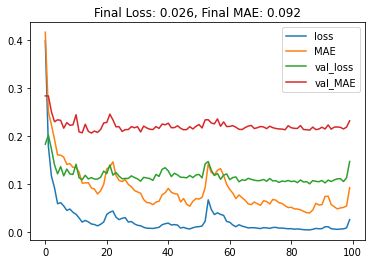

In [71]:
historydf=pd.DataFrame(history.history, index=history.epoch)
historydf.head()

final_loss=historydf['loss'].to_numpy()[-1]
final_mae=historydf['MAE'].to_numpy()[-1]

historydf.plot()
plt.title('Final Loss: %.3f, Final MAE: %.3f' % (final_loss, final_mae))